<a href="https://colab.research.google.com/github/pxs1990/DeepLearning/blob/main/inflation_forecasting_lstm_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('/content/macro_monthly.csv', parse_dates=True)

In [32]:
df.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.4
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.9
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.4
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.0
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.8


In [16]:
df.shape

(490, 12)


    'DATE': 'Date',
    'unrate': 'Unemployment_Rate',
    'psr': 'Personal_Savings_Rate',
    'm2': 'M2_Money_Stock',
    'dspic': 'Disposable_Personal_Income',
    'pce': 'Personal_Consumption_Expenditures',
    'reer': 'Real_Effective_Exchange_Rate',
    'ir': 'Interest_Rate',
    'ffer': 'Federal_Funds_Effective_Rate',
    'tcs': 'Total_Construction_Spending',
    'indpro': 'Industrial_Production_Index',
    'ccpi': 'Consumer_Price_Index'



In [33]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(5)

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1994-01-01,6.6,7.1,3481.800,7363.1,4585.1,105.21,5.750500,3.050645,513314.0,67.0596,154.5
1,1994-02-01,6.6,6.5,3459.675,7377.2,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.8
2,1994-03-01,6.5,6.8,3476.975,7401.7,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.3
3,1994-04-01,6.4,6.4,3507.150,7402.0,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.5
4,1994-05-01,6.1,7.6,3472.840,7487.4,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.9


# **Calculating percentage change in the 'cpi' to find inflation:**

fillna(0): Replaces any missing values resulting from the percentage change calculation with 0.

In [18]:
df.shape

(334, 12)

In [19]:
df.dtypes

DATE       object
unrate    float64
psr       float64
m2        float64
dspic     float64
pce       float64
reer      float64
ir        float64
ffer      float64
tcs       float64
indpro    float64
ccpi      float64
dtype: object

In [35]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [21]:
df.dtypes

DATE      datetime64[ns]
unrate           float64
psr              float64
m2               float64
dspic            float64
pce              float64
reer             float64
ir               float64
ffer             float64
tcs              float64
indpro           float64
ccpi             float64
dtype: object

In [22]:
df['DATE'].nunique()

334

In [23]:
df.duplicated().sum()

0

In [36]:
data = df.copy()
data.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1994-01-01,6.6,7.1,3481.800,7363.1,4585.1,105.21,5.750500,3.050645,513314.0,67.0596,154.5
1,1994-02-01,6.6,6.5,3459.675,7377.2,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.8
2,1994-03-01,6.5,6.8,3476.975,7401.7,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.3
3,1994-04-01,6.4,6.4,3507.150,7402.0,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.5
4,1994-05-01,6.1,7.6,3472.840,7487.4,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.9


# **Calculating percentage change in the 'ccpi' to find inflation:**

fillna(0): Replaces first missing value resulting from the percentage change calculation with 0.

In [38]:
data['cpi_pct_mom'] = round((data['ccpi'].pct_change().fillna(0))*100,2)
data['cpi_pct_yoy'] = round((data['ccpi'].pct_change(12).fillna(0))*100,2)
data.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi,cpi_pct_mom,cpi_pct_yoy
0,1994-01-01,6.6,7.1,3481.800,7363.1,4585.1,105.21,5.750500,3.050645,513314.0,67.0596,154.5,0.00,0.0
1,1994-02-01,6.6,6.5,3459.675,7377.2,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.8,0.19,0.0
2,1994-03-01,6.5,6.8,3476.975,7401.7,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.3,0.32,0.0
3,1994-04-01,6.4,6.4,3507.150,7402.0,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.5,0.13,0.0
4,1994-05-01,6.1,7.6,3472.840,7487.4,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.9,0.26,0.0


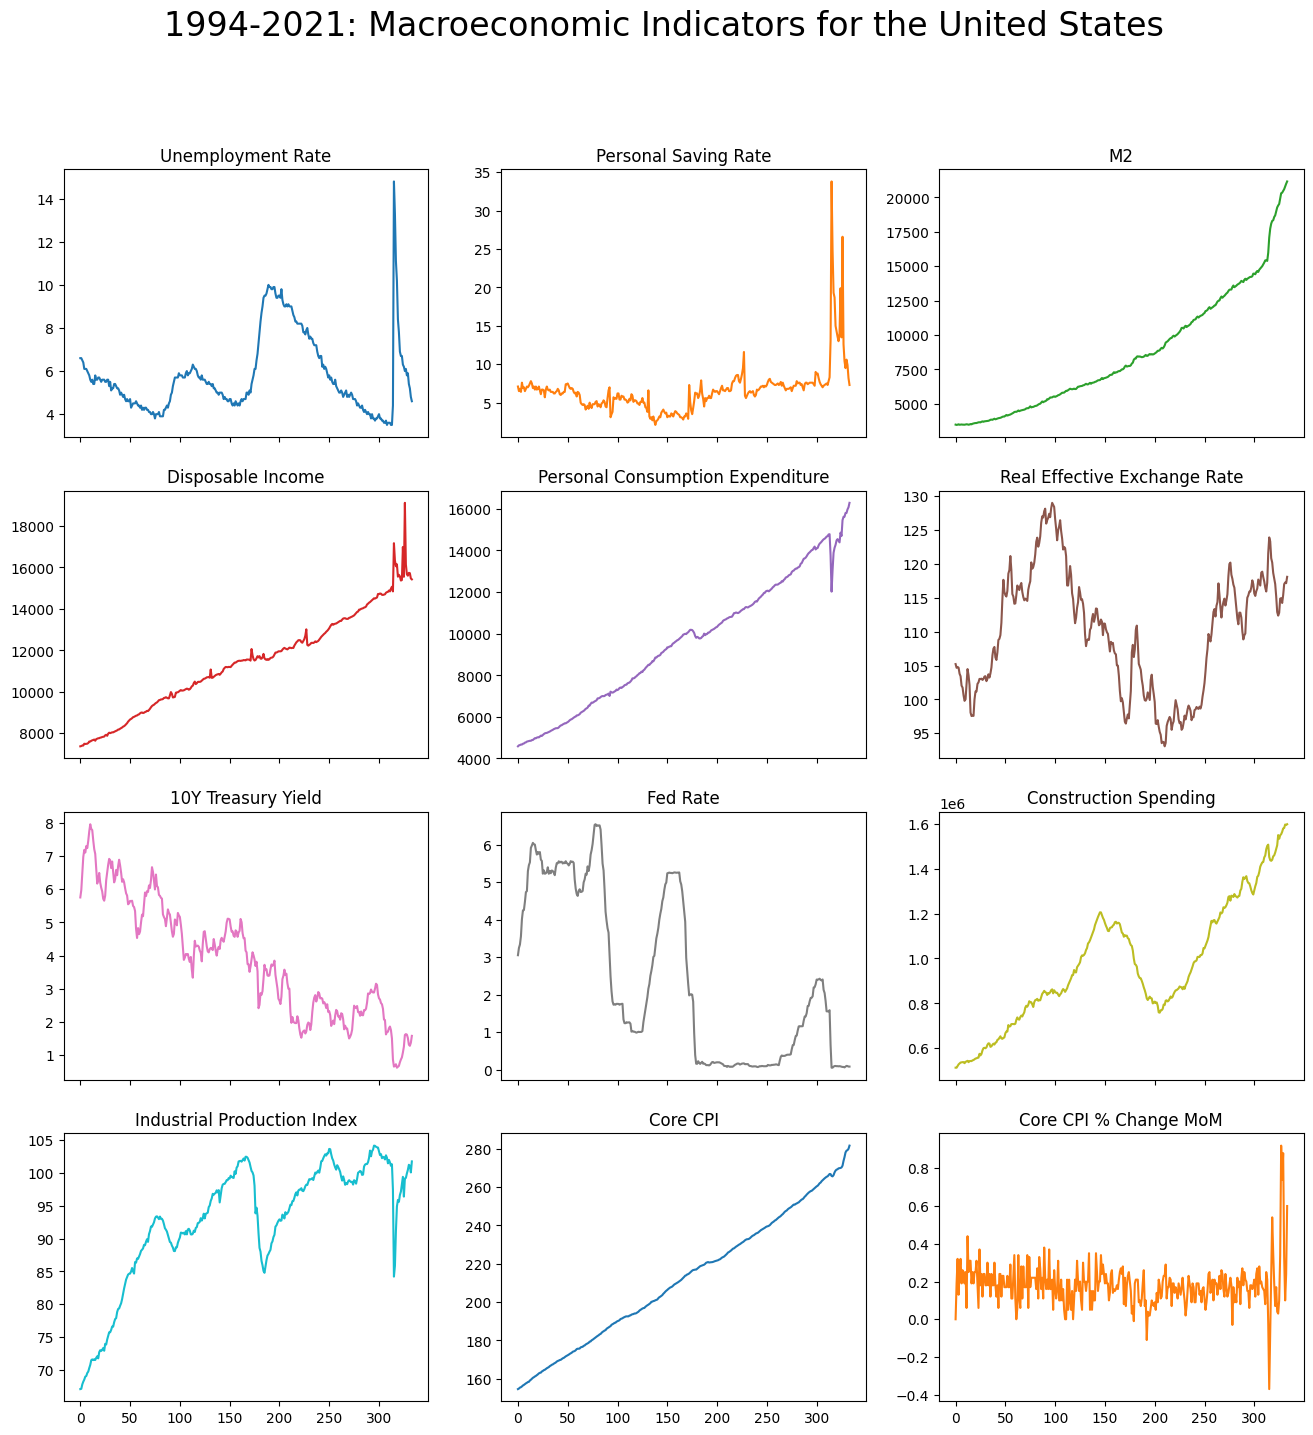

In [40]:
import matplotlib.pyplot as plt

# Plotting multiple line plots for columns in monthly_df
data.iloc[:, 1:13].plot(
    kind='line',
    subplots=True,
    figsize=(16, 16),
    title=['Unemployment Rate', 'Personal Saving Rate', 'M2', 'Disposable Income', 'Personal Consumption Expenditure', 'Real Effective Exchange Rate',
           '10Y Treasury Yield', 'Fed Rate', 'Construction Spending', 'Industrial Production Index', 'Core CPI', 'Core CPI % Change MoM'],
    legend=False,
    layout=(4, 3),
    sharex=True
)

# Adding a super title to the entire plot
plt.suptitle('1994-2021: Macroeconomic Indicators for the United States', fontsize=24)

# Display the plot
plt.show()

# **Extracting year, quarter, and month columns from the 'DATE' column for each row:**

In [42]:
data['year'] = data['DATE'].apply(lambda x: x.year)
data['quarter'] = data['DATE'].apply(lambda x: x.quarter)
data['month'] = data['DATE'].apply(lambda x: x.month)
data.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi,cpi_pct_mom,cpi_pct_yoy,year,quarter,month
0,1994-01-01,6.6,7.1,3481.800,7363.1,4585.1,105.21,5.750500,3.050645,513314.0,67.0596,154.5,0.00,0.0,1994,1,1
1,1994-02-01,6.6,6.5,3459.675,7377.2,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.8,0.19,0.0,1994,1,2
2,1994-03-01,6.5,6.8,3476.975,7401.7,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.3,0.32,0.0,1994,1,3
3,1994-04-01,6.4,6.4,3507.150,7402.0,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.5,0.13,0.0,1994,2,4
4,1994-05-01,6.1,7.6,3472.840,7487.4,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.9,0.26,0.0,1994,2,5


# **Core CPI trend by Month and Quarter:**

In [43]:
import plotly.express as px

# Create a box plot for month
fig_month = px.box(
    data[12:],  # Starting from the 13th row onwards
    x="month",
    y="cpi_pct_yoy",
    points="all",
    template="presentation"
)
fig_month.update_layout(xaxis=dict(tickmode='linear'))

# Create a box plot for quarter
fig_quarter = px.box(
    data[12:],  # Starting from the 13th row onwards
    x="quarter",
    y="cpi_pct_yoy",
    points="all",
    template="presentation"
)

# Display the plots
fig_month.show()
fig_quarter.show()

# **Core CPI trend by Year:**

In [44]:
import plotly.express as px

# Create a bar plot for month
fig_month = px.bar(
    data_frame=data.groupby(['month']).std().reset_index(),
    x="month",
    y="cpi_pct_yoy",
    text="cpi_pct_yoy"
)
fig_month.update_traces(texttemplate='%{text:0.3f}', textposition='outside')
fig_month.update_xaxes(nticks=13)

# Display the plot for month
fig_month.show()

# Create a bar plot for quarter
fig_quarter = px.bar(
    data_frame=data.groupby(['quarter']).std().reset_index(),
    x="quarter",
    y="cpi_pct_yoy",
    text="cpi_pct_yoy"
)
fig_quarter.update_traces(texttemplate='%{text:0.3f}', textposition='outside')
fig_quarter.update_xaxes(nticks=5)

# Display the plot for quarter
fig_quarter.show()

<ipython-input-44-585363dbb4b7>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-44-585363dbb4b7>:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# **Data Preprocessing for ARIMA Model:**

In [46]:
df = df.set_index('DATE')
df.head()

,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
DATE,,,,,,,,,,,
1994-01-01,6.6,7.1,3481.800,7363.1,4585.1,105.21,5.750500,3.050645,513314.0,67.0596,154.5
1994-02-01,6.6,6.5,3459.675,7377.2,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.8
1994-03-01,6.5,6.8,3476.975,7401.7,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.3
1994-04-01,6.4,6.4,3507.150,7402.0,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.5
1994-05-01,6.1,7.6,3472.840,7487.4,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.9


# **Time Series Decomposition of Core CPI:**

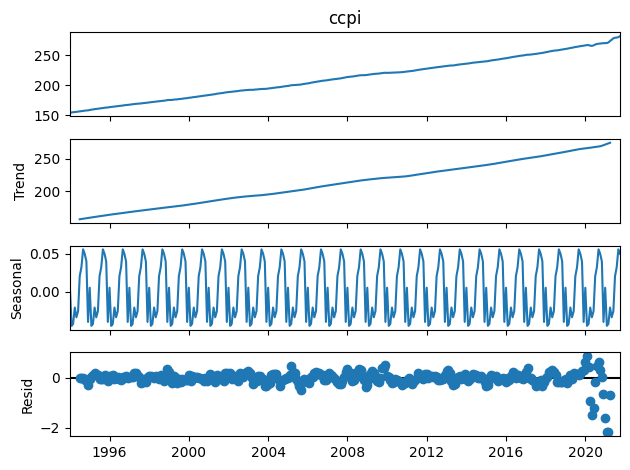

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = seasonal_decompose(df['ccpi'], model='additive').plot()

The dataset exhibits a clear upward trend, indicating non-stationarity(not normal). Since the ARIMA model relies on the assumption of stationarity, it's essential to address this non-stationarity before proceeding with the modeling process.

# **Splitting the data:**

As the dataset is small, we will use the last year as the test dataset.

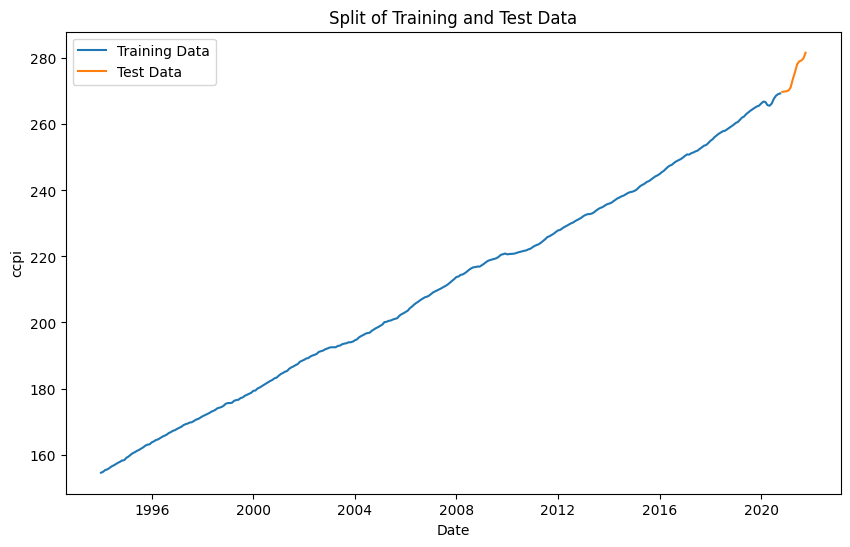

In [52]:
train = df[0:len(df) - 12]
test=df[len(df) - 12:]

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ccpi'], label='Training Data')
plt.plot(test.index, test['ccpi'], label='Test Data')
plt.xlabel('Date')
plt.ylabel('ccpi')
plt.title('Split of Training and Test Data')
plt.legend()
plt.show()

The plot reveals a noticeable decline in 2020, attributed to the pandemic-related restrictions. The orange line represents the test set.

# **Take first differences to Stationarize the data:**


In this process, we aim to determine the ideal number of differences needed to eliminate the unit root and achieve stationarity in a time series. We achieve this by iteratively applying the diff() function to the series and testing its stationarity using the Augmented Dickey-Fuller (ADF) test. The objective is to identify the minimum number of differences required to render the series stationary.







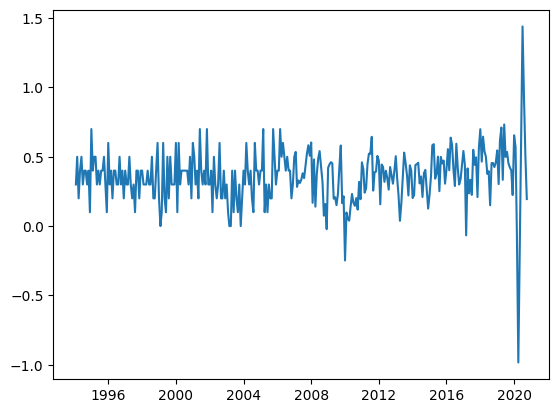

In [53]:
diff = train['ccpi'].diff()#taking 1st lag of ccpi= row1-row2
plt.plot(diff)
plt.show()

In [54]:
diff

DATE
1994-01-01      NaN
1994-02-01    0.300
1994-03-01    0.500
1994-04-01    0.200
1994-05-01    0.400
              ...  
2020-06-01    0.645
2020-07-01    1.440
2020-08-01    0.932
2020-09-01    0.501
2020-10-01    0.195
Name: ccpi, Length: 322, dtype: float64